In [ ]:
from SOSATpopy import sosat
import matplotlib.pyplot as plt
import numpy as np



10


In [ ]:
# cut plots for the different dx values
freq_list = [90]
dx_list = [0,20,60,100,160,180]


In [9]:
cut_beam = []
u_list = []
v_list = []
for freq in freq_list:
    for item in dx_list:
        for angle in [0]:
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,angle],
                        AR_file = 'AR_LIB/Ideal_AR.h5',
                        groupname= 'Ideal_AR',
                        outputfolder = '../Data/output_polar_ideal_AR/'+str(freq)+'GHz/')
            E_co, E_cx,x,y = Model1.read_beam()
            u_list.append(x)
            v_list.append(y)
            cut_beam.append(E_co.reshape(y.size,x.size))


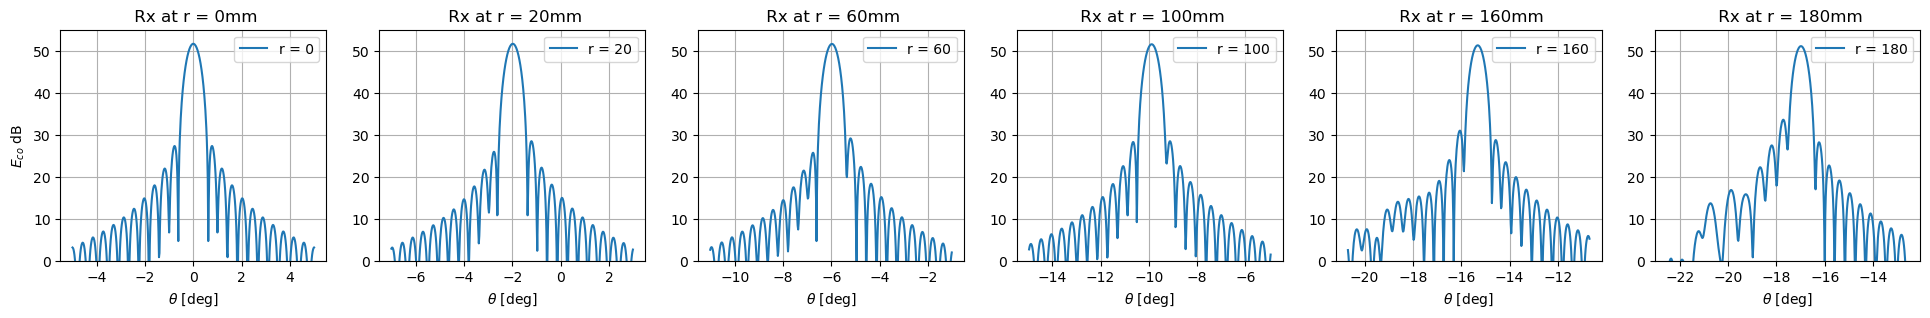

In [10]:
fig, ax = plt.subplots(1, 6, figsize=(6*4, 3 ))
n = 0 
for item in dx_list:
    ax[n].plot(u_list[n]/np.pi*180, np.log10(np.abs(cut_beam[n][int(u_list[n].size/2)]))*20, label='r = '+str(item))
    ax[n].set_title(' Rx at r = '+str(item)+'mm')
    ax[n].set_xlabel(r'$\theta$ [deg]')
    ax[0].set_ylabel(r'$E_{co}$ dB')
    ax[n].grid()
    ax[n].legend()
    ax[n].set_ylim(0,55)
    n+=1
plt.savefig('beammaps_vs_dr.png',dpi= 300)


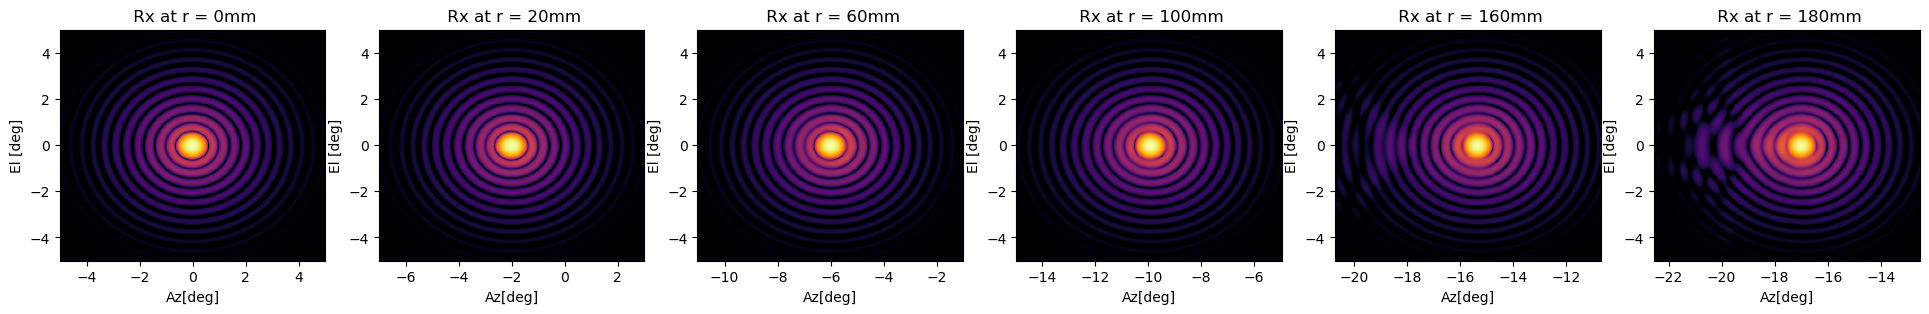

In [12]:

fig, ax = plt.subplots(1, 6, figsize=(6*4, 3 ))
n = 0 
vmax= np.log10(np.max(np.abs(cut_beam[0])))*20
vmin = vmax -50
for item in dx_list:
    ax[n].pcolor(u_list[n]/np.pi*180,v_list[n]/np.pi*180,np.log10(np.abs(cut_beam[n]))*20, vmin=vmin,vmax=vmax,cmap ='inferno')
    ax[n].set_title(' Rx at r = '+str(item)+'mm')
    ax[n].set_xlabel(r'Az[deg]')
    ax[n].set_ylabel(r'El [deg]')
    n+=1
plt.savefig('beammaps2d_vs_dr.png',dpi= 300)
